   # Aim: To produce the output sentences which speaks about 5 top most challenges the banking industry is currently facing  

## Methodology:
1. Importing all the required packages.
2. Web Scraping.
3. Data Normalization
4. Data exploration by WordCloud Visualization.
5. Data summarization by Gensim to filter out 5 top most problem statements.


## Required Packages:

In [1]:
# Web Scrapping:
import requests
import re
from bs4 import BeautifulSoup


# Normalization:
import unicodedata

# Summary:
import gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

#WordCloud: 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

# Sentence Tokenization:
import nltk

## Reference URLs:

In [2]:
url_1 = "https://www.globalbankingandfinance.com/biggest-banking-challenges-of-2020and-its-not-just-the-coronavirus/"
url_2 = "https://global.hitachi-solutions.com/blog/top-10-challenges-banking-financial-organizations-can-overcome"
url_3 = "https://www.marshmma.com/blog/top-challenges-facing-the-banking-and-financial-services-industry"
url_4 = "https://www.achieveit.com/resources/blog/top-5-strategic-challenges-in-the-banking-industry"
url_5 = "https://www.kotaksecurities.com/ksweb/Meaningful-Minutes/5-key-challenges-faced-by-Indias-banks"
url_6 = "https://technorely.com/financial-industry-challenges/"

## Web Scrapping:

- We have created a function (text_extraction) to scrape out the website data.
    * Used request library to fetch the URL.
    * Converted the fetched data in text.
    * Spliting the data with start and stop string as we wanted to make sure to remove unnecesary data(which is not related to challeges in the banking sector).
    * By using BeautifulSoup library, we have parsed and extracted the data in text format.

- Used the created function on desired URLs.
    
    
    

In [3]:
def text_extraction(url, start_str, stop_str):
    res = requests.get(url)
    html = res.text
    html = html.split(start_str)[1]
    html = html.split(stop_str)[0]
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return re.sub('[\n]'," ",soup.get_text())

In [4]:
url_to_str_1=text_extraction(url_1, 'justify">So far,','It’s critical that banks have an understanding' )
url_to_str_2=text_extraction(url_2, 'compliance pressures, and disruptive technologies.', 'How Hitachi Solutions Can Help')
url_to_str_3=text_extraction(url_3,'initial-content','MsoListParagraphCxSpLast' )
url_to_str_4=text_extraction(url_4, 'post-date', 'About AchieveIt')
url_to_str_5=text_extraction(url_5, 'Here is a look:','Click here to read about financial ratios used to analyse stocks' )
url_to_str_6=text_extraction(url_6,'industry challenges are largely generational.', 'do you see digital banking')



## Data Normalization

- We have concatenated the fetched data; talks on the challenges in banking sector. 

- Normalized the data using normalize module from unicodedata library; especially using NFKD
    * The Unicode standard defines various normalization forms of a Unicode string, based on the definition of canonical equivalence and compatibility equivalence. NFKD is one of the normal form of Unicode.
    * Normal form D (NFKD) is also known as canonical decomposition, and translates each character into its decomposed form.

In [5]:
total =url_to_str_1+url_to_str_2+ url_to_str_3 + url_to_str_4+ url_to_str_5 + url_to_str_6
total_1 = re.sub('[\r0-9]',"",total)
document = unicodedata.normalize("NFKD", total_1)

## Exploring the data using WordCloud Visualization 

- Data Preprocessing
-- We have tokenized the sentence by using the nltk library and removed the Stopwords and we have converted the text to lower case
- Defined the Word cloud hyper parametrs and ploted the image by using matplotlib. 


In [6]:
## sentence Tokenization
st_token = nltk.sent_tokenize
sentences= st_token(document)

In [7]:
comment = '' 
stopwords = set(STOPWORDS)

In [8]:

for i in sentences: 
    i = str(i)
    tokens = i.split() 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower()       
    comment += " ".join(tokens)+" "

In [9]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment) 

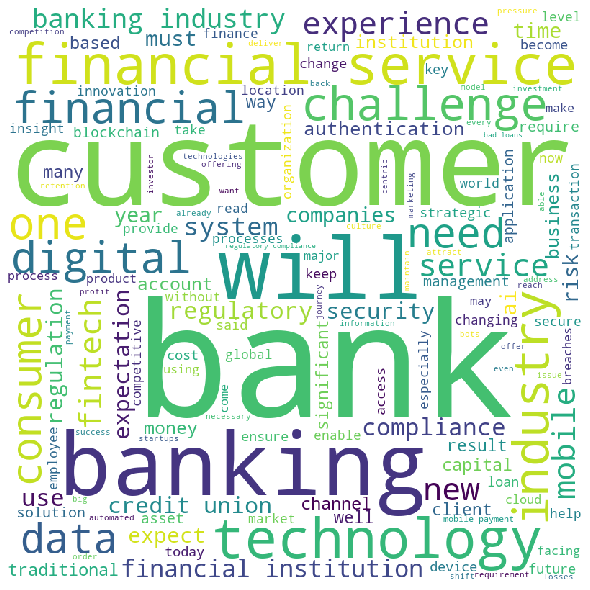

In [10]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Data Summarization

- We have used Gensim library to do a textrank analysis on the data.(Brief explaination on Gensim is in the report)
- We have summarized the data to output "Top 5 challenges faced by banking industry" using summarise and keyword functions from Gensim package.
### We have achieved  5 top most discussed problem statements in the refered websites with 97% compression rate. (Compression rate: Amount of data compressed to create the summary)

In [11]:
summary = summarize(str(document),ratio=0.055, word_count= 180)
keyword = keywords(str(document),ratio=0.1)

In [12]:
print('"Top 5 Challenges faced in Banking Industry:"\n',summary)
print("\nOriginal text character length :",len(str(document)))
print("\nSummary text character length:",len(summary))
print("\nCompression ratio:",round(100-(100*len(summary)/len(str(document)))),"%")
print("\nKeywords:\n",keyword)

"Top 5 Challenges faced in Banking Industry:"
 Digitalisation of banks Customers expect a quick, easy and seamless digital journey so what we are seeing in the industry is a shift from very manual, product centric workflow processes towards a true digital client experience.
The emergence of FinTech/non-bank startups is changing the competitive landscape in financial services, forcing traditional institutions to rethink the way they do business.
From Basel’s risk-weighted capital requirements to the Dodd-Frank Act, and from the Financial Account Standards Board’s Current Expected Credit Loss (CECL) to the Allowance for Loan and Lease Losses (ALLL), there are a growing number of regulations that banks and credit unions must comply with; compliance can significantly strain resources and is often dependent on the ability to correlate data from disparate sources.
Traditional banks especially are experiencing these types of challenges, forcing them to constantly evaluate and improve their op